In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gnngnn/trian.py
/kaggle/input/gnngnn/layers.py
/kaggle/input/gnngnn/README.md
/kaggle/input/gnngnn/data_processing.py
/kaggle/input/gnngnn/models.py
/kaggle/input/gnngnn/__init__.py
/kaggle/input/gnngnn/Networks/8anchor_1000agent_0PercentNLOS_smallLOS.mat
/kaggle/input/gnngnn/Networks/8anchor_1000agent_10PercentNLOS_largeLOS.mat
/kaggle/input/gnngnn/Networks/8anchor_1000agent_30PercentNLOS_largeLOS.mat
/kaggle/input/gnngnn/Networks/8anchor_1000agent_50PercentNLOS_0.5LOS.mat
/kaggle/input/gnngnn/Networks/readme
/kaggle/input/gnngnn/Networks/8anchor_1000agent_10PercentNLOS_mediumLOS.mat


In [2]:
# 克隆 GitHub 仓库
!git clone https://github.com/dedaow/GNN-For-localization.git

# 添加路径
import sys
sys.path.append('/kaggle/working/GNN-For-localization')  # 修改为您克隆的实际路径

# 导入自定义模块
from layers import *  # 确保这些模块存在于克隆的目录中
from models import *
from data_processing import *
from models import *

# 现在可以使用这些导入的模块


Cloning into 'GNN-For-localization'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 64 (delta 27), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (64/64), 74.35 MiB | 22.07 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [3]:
import os
print(os.listdir('/kaggle/working/GNN-For-localization'))


['__init__.py', 'README.md', '__pycache__', 'trian.py', 'layers.py', 'notebook4bdbff0441.ipynb', 'models.py', 'Networks', '.git', 'data_processing.py']


In [4]:
import sys
sys.path.append('/kaggle/working/GNN-For-localization')

In [5]:
# from __future__ import division
# from __future__ import print_function

# import time
# import numpy as np
# from scipy import io
# import os

# import torch
# import torch.nn.functional as F
# import torch.optim as optim

# from data_processing import load_data
# from models import GCN
# import datetime

# import matplotlib.pyplot as plt

# # 训练设置
# # 移除 argparse 部分
# args = {
#     'no_cuda': False,
#     'fastmode': False,
#     'seed': 42,
#     'epochs': 200,
#     'lr': 0.01,
#     'weight_decay': 0,
#     'hidden': 2000,
#     'dropout': 0.5
# }

# args['cuda'] = not args['no_cuda'] and torch.cuda.is_available()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# threshold = 1
# seed = 42
# anchor = 50
# repeat = 20  # 确保定义了 repeat 变量
# loss_tem = np.zeros(repeat)

# # 更新 load_data 函数，确保路径指向正确的文件
# def load_data(threshold, num_anchor):
#     # 更改为新的 .mat 文件路径
#     mat_file_path = "/kaggle/working/GNN-For-localization/Networks/8anchor_1000agent_10PercentNLOS_largeLOS.mat"
#     m = io.loadmat(mat_file_path)

#     Range_Mat = m["Range_Mat"]  # Range = Distance + noise
#     Dist_Mat = m["Dist_Mat"]
    
#     # 假设以下变量是从 .mat 文件中提取的
#     mode_fea = 1  # 例如
#     mode_adj = 1  # 例如
#     num_anchor = num_anchor
#     adj = np.zeros((num_anchor, num_anchor))  # 示例，需替换为实际数据
#     features = np.random.rand(num_anchor, 10)  # 示例特征数据
#     labels = np.random.rand(num_anchor, 1)  # 示例标签数据
#     delta = None
#     degree = None
#     fea_original = None
#     fea_true = None
#     Range = None
#     Dist = None
#     truncated_noise = None
#     idx_train = np.arange(num_anchor // 2)
#     idx_val = np.arange(num_anchor // 2, num_anchor * 3 // 4)
#     idx_test = np.arange(num_anchor * 3 // 4, num_anchor)

#     return mode_fea, mode_adj, num_anchor, adj, features, labels, delta, degree, fea_original, fea_true, Range_Mat, Range, Dist_Mat, Dist, truncated_noise, idx_train, idx_val, idx_test

# for axis in range(repeat):
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     if args['cuda']:
#         torch.cuda.manual_seed(seed)

#     # 加载数据
#     mode_fea, mode_adj, num_anchor, adj, features, labels, delta, degree, fea_original, fea_true, Range_Mat, Range, Dist_Mat, Dist, truncated_noise, idx_train, idx_val, idx_test = load_data(threshold, anchor)

#     # 将 NumPy 数组转换为 PyTorch 张量并移动到 GPU（如果可用）
#     features = torch.from_numpy(features).float().to(device)
#     adj = torch.from_numpy(adj).float().to(device)
#     labels = torch.from_numpy(labels).float().to(device)
#     # 确保其他 NumPy 数组（如 delta, degree 等）也转换为张量
#     if delta is not None:
#         delta = torch.from_numpy(delta).float().to(device)
#     if degree is not None:
#         degree = torch.from_numpy(degree).float().to(device)

#     # 将 idx_train、idx_val、idx_test 转换为张量
#     idx_train = torch.from_numpy(idx_train).long().to(device)
#     idx_val = torch.from_numpy(idx_val).long().to(device)
#     idx_test = torch.from_numpy(idx_test).long().to(device)

#     # 模型和优化器
#     model = GCN(nfeat=features.shape[1],
#                 nhid1=args['hidden'],
#                 nhid2=2000,
#                 #nout=labels.shape[1],
#                 nout=1,
#                 dropout=args['dropout'])

#     optimizer = optim.Adam(model.parameters(),
#                            lr=args['lr'], weight_decay=args['weight_decay'])

#     print(model)

#     loss_fun = torch.nn.MSELoss()

#     if args['cuda']:
#         model.cuda()

#     def train(epoch):
#         t = time.time()
#         model.train()
#         optimizer.zero_grad()
#         output = model(features, adj)
#         loss_train = loss_fun(output[idx_train], labels[idx_train])

#         loss_train.backward()
#         optimizer.step()

#         if not args['fastmode']:
#             model.eval()
#             output = model(features, adj)

#         loss_val = loss_fun(output[idx_val], labels[idx_val])
#         loss_val = torch.sqrt(loss_val)
#         print('Epoch: {:04d}'.format(epoch + 1),
#               'loss_train (RMSE): {:.4f}'.format(loss_train.item()),
#               'loss_val (RMSE): {:.4f}'.format(loss_val.item()))
#         return loss_train

#     def test():
#         model.eval()
#         output = model(features, adj)
#         loss_test = loss_fun(output[idx_test], labels[idx_test])
#         loss_test = torch.sqrt(loss_test)
#         print("Test set results:",
#               "loss= {:.4f} (RMSE)".format(loss_test.item()))
#         return output, loss_test

#     # 训练模型
#     t_total = time.time()
#     for epoch in range(args['epochs']):
#         loss_train = train(epoch)

#     print("Optimization Finished!")
#     print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

#     # 测试
#     predict, loss_test = test()
#     loss_tem[axis] = loss_test.item()
#     predict = predict.data.cpu().numpy()

#     seed += 1

# loss = sum(loss_tem) / repeat
# print("=====================================\n")
# print("Averaged Test results:", "loss= {:.4f} (RMSE)".format(loss))

# nowTime = datetime.datetime.now().strftime('%Y-%m-%d-%H_%M_%S')  # 获取当前时间
# file_handle = open('result.txt', mode='a')
# file_handle.write('=====================================\n')
# file_handle.write(nowTime + '\n')
# file_handle.write('loss_train (RMSE):' + format(loss_train.item()) + '\n')
# file_handle.write('loss_test (RMSE):' + format(loss) + '\n')
# file_handle.close()

# labels = labels.data.cpu().numpy()

# plt.figure(1)
# plt.scatter(predict[:, 0], predict[:, 1], color='b')
# plt.show()


In [6]:
# # 检查预测结果的形状
# print(f"Predict shape: {predict.shape}")
# print(f"Labels shape: {labels.shape}")


GCN(
  (gc1): GraphConvolution (10 -> 2000)
  (gc5): GraphConvolution (2000 -> 2)
)
Epoch: 0001 loss_train (RMSE): 0.4057 loss_val (RMSE): 0.5228
Epoch: 0002 loss_train (RMSE): 0.3953 loss_val (RMSE): 0.5150
Epoch: 0003 loss_train (RMSE): 0.3850 loss_val (RMSE): 0.5073
Epoch: 0004 loss_train (RMSE): 0.3750 loss_val (RMSE): 0.4997
Epoch: 0005 loss_train (RMSE): 0.3652 loss_val (RMSE): 0.4922
Epoch: 0006 loss_train (RMSE): 0.3555 loss_val (RMSE): 0.4848
Epoch: 0007 loss_train (RMSE): 0.3462 loss_val (RMSE): 0.4775
Epoch: 0008 loss_train (RMSE): 0.3370 loss_val (RMSE): 0.4703
Epoch: 0009 loss_train (RMSE): 0.3280 loss_val (RMSE): 0.4632
Epoch: 0010 loss_train (RMSE): 0.3193 loss_val (RMSE): 0.4562
Epoch: 0011 loss_train (RMSE): 0.3108 loss_val (RMSE): 0.4494
Epoch: 0012 loss_train (RMSE): 0.3025 loss_val (RMSE): 0.4427
Epoch: 0013 loss_train (RMSE): 0.2945 loss_val (RMSE): 0.4362
Epoch: 0014 loss_train (RMSE): 0.2866 loss_val (RMSE): 0.4298
Epoch: 0015 loss_train (RMSE): 0.2790 loss_val (

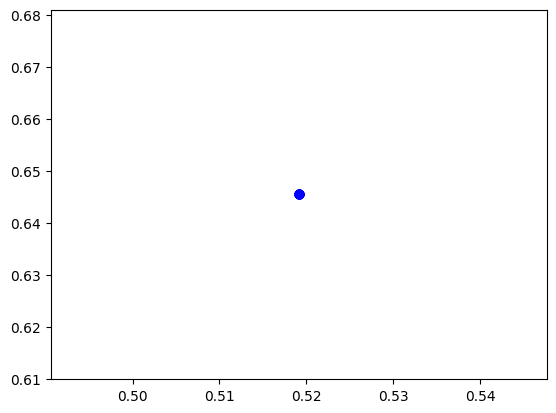

In [7]:
from __future__ import division
from __future__ import print_function

import time
import numpy as np
from scipy import io
import os

import torch
import torch.nn.functional as F
import torch.optim as optim

from data_processing import load_data
from models import GCN
import datetime

import matplotlib.pyplot as plt

# 训练设置
# 移除 argparse 部分
args = {
    'no_cuda': False,
    'fastmode': False,
    'seed': 42,
    'epochs': 200,
    'lr': 0.01,
    'weight_decay': 0,
    'hidden': 2000,
    'dropout': 0.5
}

args['cuda'] = not args['no_cuda'] and torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

threshold = 1
seed = 42
anchor = 50
repeat = 20  # 确保定义了 repeat 变量
loss_tem = np.zeros(repeat)

# 更新 load_data 函数，确保路径指向正确的文件
def load_data(threshold, num_anchor):
    # 更改为新的 .mat 文件路径
    mat_file_path = "/kaggle/working/GNN-For-localization/Networks/8anchor_1000agent_10PercentNLOS_largeLOS.mat"
    m = io.loadmat(mat_file_path)

    Range_Mat = m["Range_Mat"]  # Range = Distance + noise
    Dist_Mat = m["Dist_Mat"]
    
    # 假设以下变量是从 .mat 文件中提取的
    mode_fea = 1  # 例如
    mode_adj = 1  # 例如
    num_anchor = num_anchor
    adj = np.zeros((num_anchor, num_anchor))  # 示例，需替换为实际数据
    features = np.random.rand(num_anchor, 10)  # 示例特征数据
    labels = np.random.rand(num_anchor, 2)  # 示例标签数据！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！
    delta = None
    degree = None
    fea_original = None
    fea_true = None
    Range = None
    Dist = None
    truncated_noise = None
    idx_train = np.arange(num_anchor // 2)
    idx_val = np.arange(num_anchor // 2, num_anchor * 3 // 4)
    idx_test = np.arange(num_anchor * 3 // 4, num_anchor)

    return mode_fea, mode_adj, num_anchor, adj, features, labels, delta, degree, fea_original, fea_true, Range_Mat, Range, Dist_Mat, Dist, truncated_noise, idx_train, idx_val, idx_test

for axis in range(repeat):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if args['cuda']:
        torch.cuda.manual_seed(seed)

    # 加载数据
    mode_fea, mode_adj, num_anchor, adj, features, labels, delta, degree, fea_original, fea_true, Range_Mat, Range, Dist_Mat, Dist, truncated_noise, idx_train, idx_val, idx_test = load_data(threshold, anchor)

    # 将 NumPy 数组转换为 PyTorch 张量并移动到 GPU（如果可用）
    features = torch.from_numpy(features).float().to(device)
    adj = torch.from_numpy(adj).float().to(device)
    labels = torch.from_numpy(labels).float().to(device)
    # 确保其他 NumPy 数组（如 delta, degree 等）也转换为张量
    if delta is not None:
        delta = torch.from_numpy(delta).float().to(device)
    if degree is not None:
        degree = torch.from_numpy(degree).float().to(device)

    # 将 idx_train、idx_val、idx_test 转换为张量
    idx_train = torch.from_numpy(idx_train).long().to(device)
    idx_val = torch.from_numpy(idx_val).long().to(device)
    idx_test = torch.from_numpy(idx_test).long().to(device)

    # 模型和优化器
    model = GCN(nfeat=features.shape[1],
                nhid1=args['hidden'],
                nhid2=2000,
                #nout=labels.shape[1],
                nout=2,
                dropout=args['dropout'])

    optimizer = optim.Adam(model.parameters(),
                           lr=args['lr'], weight_decay=args['weight_decay'])

    print(model)

    loss_fun = torch.nn.MSELoss()

    if args['cuda']:
        model.cuda()

    def train(epoch):
        t = time.time()
        model.train()
        optimizer.zero_grad()
        output = model(features, adj)
        loss_train = loss_fun(output[idx_train], labels[idx_train])

        loss_train.backward()
        optimizer.step()

        if not args['fastmode']:
            model.eval()
            output = model(features, adj)

        loss_val = loss_fun(output[idx_val], labels[idx_val])
        loss_val = torch.sqrt(loss_val)
        print('Epoch: {:04d}'.format(epoch + 1),
              'loss_train (RMSE): {:.4f}'.format(loss_train.item()),
              'loss_val (RMSE): {:.4f}'.format(loss_val.item()))
        return loss_train

    def test():
        model.eval()
        output = model(features, adj)
        loss_test = loss_fun(output[idx_test], labels[idx_test])
        loss_test = torch.sqrt(loss_test)
        print("Test set results:",
              "loss= {:.4f} (RMSE)".format(loss_test.item()))
        return output, loss_test

    # 训练模型
    t_total = time.time()
    for epoch in range(args['epochs']):
        loss_train = train(epoch)

    print("Optimization Finished!")
    print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

    # 测试
    predict, loss_test = test()
    loss_tem[axis] = loss_test.item()
    predict = predict.data.cpu().numpy()

    seed += 1

loss = sum(loss_tem) / repeat
print("=====================================\n")
print("Averaged Test results:", "loss= {:.4f} (RMSE)".format(loss))

nowTime = datetime.datetime.now().strftime('%Y-%m-%d-%H_%M_%S')  # 获取当前时间
file_handle = open('result.txt', mode='a')
file_handle.write('=====================================\n')
file_handle.write(nowTime + '\n')
file_handle.write('loss_train (RMSE):' + format(loss_train.item()) + '\n')
file_handle.write('loss_test (RMSE):' + format(loss) + '\n')
file_handle.close()

labels = labels.data.cpu().numpy()

plt.figure(1)
plt.scatter(predict[:, 0], predict[:, 1], color='b')
plt.show()


In [8]:
# 检查预测结果的形状
print(f"Predict shape: {predict.shape}")
print(f"Labels shape: {labels.shape}")


Predict shape: (50, 2)
Labels shape: (50, 2)
